### importing libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use("seaborn")
import numpy as np
from scipy.fft import rfft, rfftfreq #fourier transformation package
import pywt

### storing names of all csv files per folder

In [19]:
heated = ["25-1","25-2","25-3","250-1","250-2","250-3","500-1","500-2","500-3","750-1","750-2","750-3","1000-1","1000-2","1000-3"]
room_b = ["B-250-1","B-250-2","B-250-3","B-500-1","B-500-2","B-500-3","B-750-1","B-750-2","B-750-3","B-1000-1","B-1000-2","B-1000-3"]
room_w = ["W-250-1","W-250-2","W-250-3","W-500-1","W-500-2","W-500-3","W-750-1","W-750-2","W-750-3","W-1000-1","W-1000-2","W-1000-3"]
sat_b = ["B-250-1","B-250-2","B-250-3","B-500-1","B-500-2","B-500-3","B-750-1","B-750-2","B-750-3","B-1000-1","B-1000-2","B-1000-3"]
sat_w = ["W-250-1","W-250-2","W-250-3","W-500-1","W-500-2","W-500-3","W-750-1","W-750-2","W-750-3","W-1000-1","W-1000-2","W-1000-3"]

### importing one file and preprocessing it

In [64]:
#mostly dropping rows & columns
#then resetting index
df = pd.read_csv("./CSV/Heated/750-1.csv", sep=r'\s*,\s*',engine='python')
df.drop(df.index[0:14],0,inplace=True)
df = df.reset_index(drop=True)
df.columns = df.iloc[0]
df.drop(df.index[0:2], inplace=True)
df = df.reset_index(drop=True)
df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
df

,ID,Date & Time,Measurement Type,Velocity [m/s],Time 1 [Âµs],Time 2 [Âµs],Distance [m],Crack Depth [m],Correction Factor,Ambient Temperature [Â°C],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,42155,27.5.2018 1:46:45,Direct (default),1526,66.2,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,-83.9,-100.0,-100.0
1,42154,27.5.2018 1:46:44,Direct (default),1549,65.2,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,-77.4,-100.0,-100.0
2,42153,27.5.2018 1:46:43,Direct (default),1549,65.2,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,-75.7,-100.0,-100.0
3,42152,27.5.2018 1:46:42,Direct (default),1549,65.2,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,-70.9,-100.0,-100.0
4,42151,27.5.2018 1:46:41,Direct (default),1514,66.7,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,-58.2,-100.0,-100.0
5,42150,27.5.2018 1:46:40,Direct (default),1503,67.2,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,-6.6,-100.0,-100.0
6,42149,27.5.2018 1:46:39,Direct (default),1485,68,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,64.2,-100.0,-100.0
7,42148,27.5.2018 1:46:38,Direct (default),1494,67.6,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,58.8,-100.0,-100.0
8,42147,27.5.2018 1:46:37,Direct (default),1485,68,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,43.2,-100.0,-100.0
9,42146,27.5.2018 1:46:36,Direct (default),1477,68.4,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,12.6,-100.0,-100.0


In [21]:
time = np.arange(start=0, stop=199, step=0.5) #x-axis for the observations

### plotting all observations for a csv

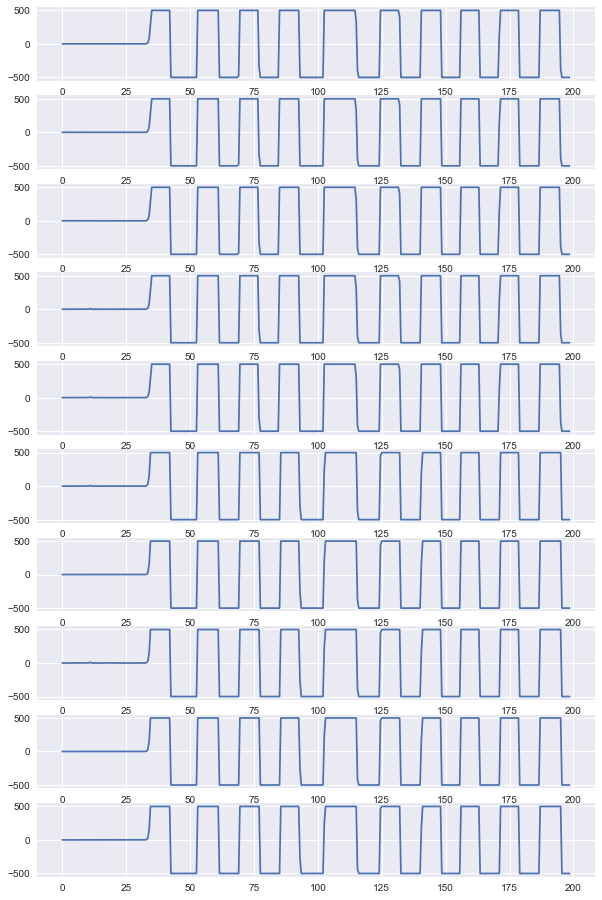

In [22]:
fig, axs = plt.subplots(10, figsize=(10,16))
for i in range(0,10):
    axs[i].plot(time, df.iloc[i, 21:].astype(float)*5) 
#df.iloc[i, 21:] gives all the values for each observation
#multiplied by 5 because amplitude is 500

### plotting all fft'ed graphs for all observations of a csv

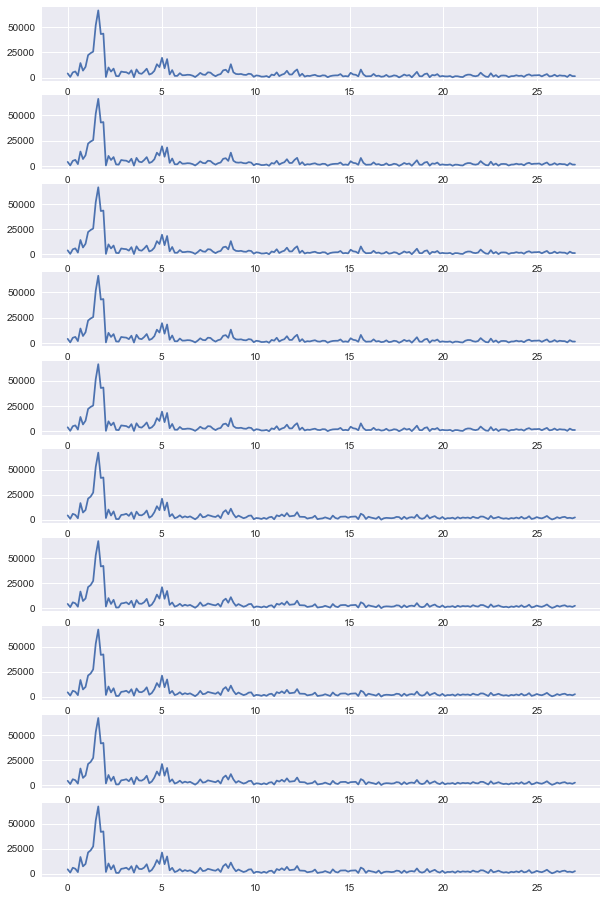

In [23]:
fig_f, axs_f = plt.subplots(10, figsize=(10,16))
for i in range(0,10):
    axs_f[i].plot(rfftfreq(len(df.iloc[i][21:]), 1/54), np.abs(rfft(df.iloc[i][21:]*5)))

# actual required part of the project

### creating the dataframe that stores the frequency values obtained from fft

In [24]:
new_df = pd.DataFrame(columns = ['Type', 'Sub Type', 'Temperature', 'ID', 'Max Frequency', 'Mean Frequency', 'Centroid'])
new_df

,Type,Sub Type,Temperature,ID,Max Frequency,Mean Frequency,Centroid


### looping through the csv files in the heated folder, preprocessing it, running observations through fft then calculating and storing the required frequencies

In [25]:
for df_name in heated:
    df = pd.read_csv("./CSV/Heated/"+df_name+".csv", sep=r'\s*,\s*',engine='python')
    df.drop(df.index[0:14],0,inplace=True)
    df = df.reset_index(drop=True)
    df.columns = df.iloc[0]
    df.drop(df.index[0:2], inplace=True)
    df = df.reset_index(drop=True)
    df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
    for i in df.index:
        freq = np.abs(rfft(df.iloc[i][21:]))
        amp = rfftfreq(len(df.iloc[i][21:]), 1/54)
        amp_sum = np.sum(amp)
        centroid_freq = 0.0
        for j in range(len(freq)):
            centroid_freq += freq[j]*amp[j]
        centroid_freq/=(amp_sum*1.0)
        new_df.loc[len(new_df.index)] = ['Heated', '', df_name[:-2], df['ID'][i], np.max(freq), np.mean(freq), centroid_freq]

### doing the same as above for room temperature csv files

In [26]:
for df_type in [room_b, room_w]:
    for df_name in df_type:
        sub_type = 'Brine' if df_name[0]=='B' else 'Water' #checking subtype based on first letter of the csv files
        df = pd.read_csv("./CSV/Room Temp/"+sub_type+"/"+df_name+".csv", sep=r'\s*,\s*',engine='python')
        df.drop(df.index[0:14],0,inplace=True)
        df = df.reset_index(drop=True)
        df.columns = df.iloc[0]
        df.drop(df.index[0:2], inplace=True)
        df = df.reset_index(drop=True)
        df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
        for i in df.index:
            freq = np.abs(rfft(df.iloc[i][21:]))
            amp = rfftfreq(len(df.iloc[i][21:]), 1/54)
            #formula for centroid freq is ∑ (freq[i]*amp[i]) / (∑ amp[i])
            centroid_freq = 0.0
            for j in range(len(freq)):
                centroid_freq += freq[j]*amp[j]
            centroid_freq/=np.sum(amp)
            new_df.loc[len(new_df.index)] = ['Heated', sub_type, df_name[2:-2], df['ID'][i], np.max(freq), np.mean(freq), centroid_freq]

### sorting the dataframe wrt the ID of each observation and then exporting it

In [27]:
new_df = new_df.sort_values('ID')
new_df = new_df.reset_index(drop=True) #resetting index after sorting
#new_df.to_csv("Fourier Frequencies.csv", index=False) #exporting dataframe

In [28]:
new_df

,Type,Sub Type,Temperature,ID,Max Frequency,Mean Frequency,Centroid
0,Heated,,25,38018,13017.758308,515.642954,191.355424
1,Heated,,25,38019,13107.175134,513.813407,190.086847
2,Heated,,25,38020,12916.045607,544.135598,211.259347
3,Heated,,25,38021,12757.375274,554.907646,218.020165
4,Heated,,25,38022,12766.082834,566.431613,225.401844
...,...,...,...,...,...,...,...
435,Heated,Water,1000,47369,8001.812431,501.815465,251.982463
436,Heated,Water,1000,47370,8004.747350,502.330115,252.943183
437,Heated,Water,1000,47371,8006.083649,502.315674,252.862845
438,Heated,Water,1000,47372,8009.115363,502.304882,252.848694


In [59]:
wavelist = ['gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl']
wavelist

['gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl']

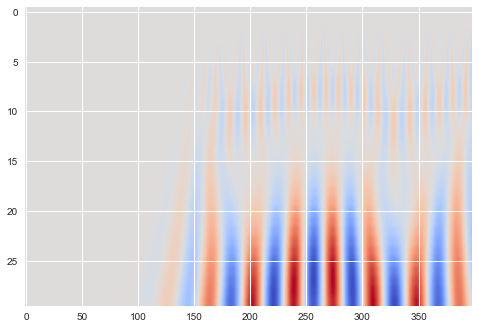

In [65]:
coef, freq = pywt.cwt(df.iloc[0][21:], np.arange(1, 31), 'morl')
plt.imshow(coef, cmap = 'coolwarm', aspect = 'auto')

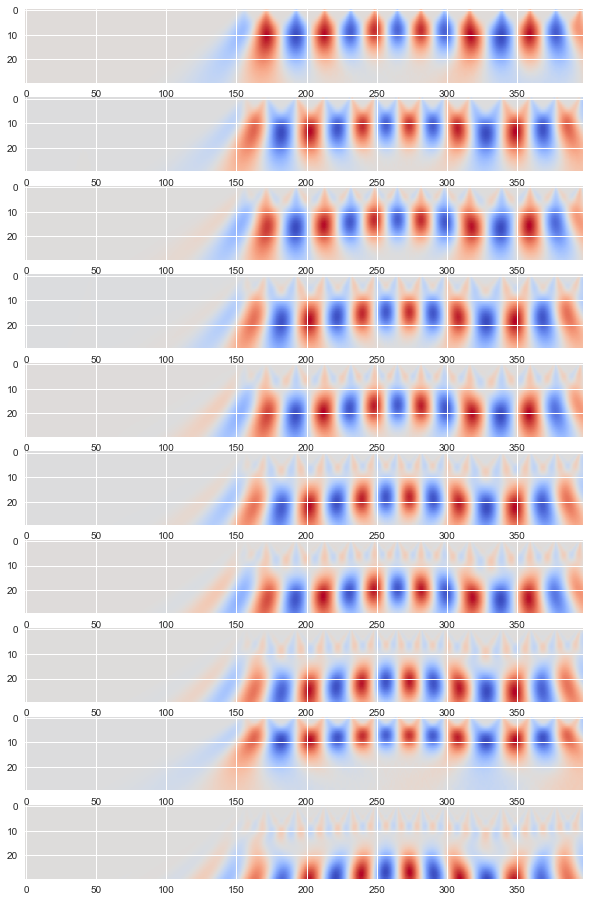

In [66]:
fig_w, axs_w = plt.subplots(len(wavelist), figsize=(10,16))
for i in range(len(wavelist)):
    coef, freq = pywt.cwt(df.iloc[9][21:], np.arange(1, 31), wavelist[i])
    axs_w[i].imshow(coef, cmap = 'coolwarm', aspect = 'auto')   

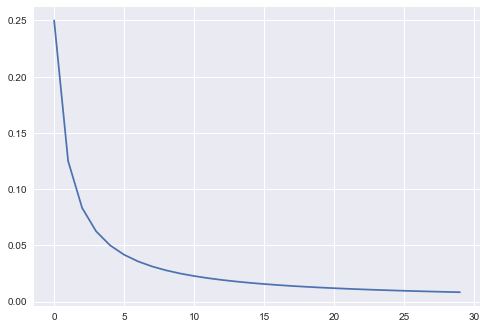

In [30]:
plt.plot(freq)

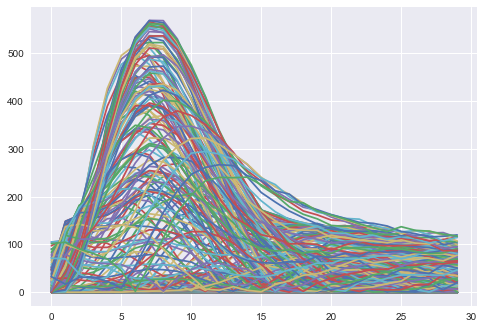

In [31]:
plt.plot(abs(coef))
plt.show()